## Imports

In [54]:
# basic imports
import os 
import glob

# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#modelsw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

In [55]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',680)

In [56]:
glob.glob('*')

['1_Pure_Truncation_Start_Bal_Ella_Version2-editedJulia.ipynb',
 '2_loan_outcome_determination.ipynb',
 '3_individual_outcome_determination.ipynb',
 '4_merge_predictors_with_outcome.ipynb',
 '5_format_data.ipynb',
 '6_train_test_split.ipynb',
 '7_MLexplore-Ella.ipynb',
 '7_MLexplore.ipynb',
 'all_data.csv',
 'binary_test.csv',
 'binary_train.csv',
 'binary_x_test.csv',
 'binary_x_train.csv',
 'binary_y_test.csv',
 'binary_y_train.csv',
 'data_merged_nocatvars.csv',
 'data_merged_noMissingData.csv',
 'diaries_trx_trunc_loans_start_bal.csv',
 'heatmap.jpg',
 'individual_outcomes_33_150.csv',
 'loan_outcomes_33_150.csv',
 'Pure_Truncation_Start_Bal_Ella_Version2.ipynb']

In [57]:
x_train = pd.read_csv('binary_x_train.csv')
x_test  = pd.read_csv('binary_x_test.csv')
y_train = pd.read_csv('binary_y_train.csv')
y_test  = pd.read_csv('binary_y_test.csv')

In [58]:
x_train.shape

(89, 96)

In [59]:
x_train.owner_score.head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    1.0
7    0.0
8    1.0
9    0.0
Name: owner_score, dtype: float64

In [60]:
y_train.shape

(89, 1)

In [61]:
y_train.head(10)

,owner_score_bin
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,0


In [62]:
x_train = x_train.drop(['owner_score'], axis = 1)
x_test  = x_test.drop(['owner_score'], axis = 1)

In [63]:
y_train.columns = ['outcome']
y_test.columns = ['outcome']

## Associations: 

In [64]:
associations = pd.concat([x_train,y_train], axis=1)

In [65]:
associations.outcome.value_counts(normalize=True)

1    0.775281
0    0.224719
Name: outcome, dtype: float64

In [66]:
# corr = associations[associations.columns].corr()
# plt.figure(figsize=(30, 30))
# sns.heatmap(corr, annot = True, cmap='coolwarm')

## It appears that there is a lot of correlation among a few features; this makes sense b/c some are mean, some are median measures of the same thing. Let's only keep one of those for now & redo the correlation plot: 

In [67]:
med_cols = [col for col in x_train.columns if 'med' in col]
med_cols

['con_pur_hh_medpti_x',
 'con_pur_hh_medpti_ALC',
 'con_pur_hh_medpti_CLN',
 'con_pur_hh_medpti_CLTH',
 'con_pur_hh_medpti_COMM',
 'con_pur_hh_medpti_EDU',
 'con_pur_hh_medpti_ENRGY',
 'con_pur_hh_medpti_ENT',
 'con_pur_hh_medpti_FOOD',
 'con_pur_hh_medpti_H20',
 'con_pur_hh_medpti_HSNG',
 'con_pur_hh_medpti_MED',
 'con_pur_hh_medpti_OTH',
 'con_pur_hh_medpti_PERS',
 'con_pur_hh_medpti_REL',
 'con_pur_hh_medpti_TRNSP',
 'Unnamed: 0_x']

In [68]:
x_train = x_train.drop(med_cols, axis = 1)
x_test  = x_test.drop(med_cols, axis = 1)

## Other columns to drop (duplicates)

In [69]:
drop_cols = ["dem_i_hhead","m_ids_x","m_ids_y","con_pur_hh_meanptrx","con_pur_hh_sdptrx"]

In [70]:
x_train = x_train.drop(drop_cols, axis = 1)
x_test  = x_test.drop(drop_cols, axis = 1)

In [71]:
associations = pd.concat([x_train,y_train], axis=1)

In [72]:
associations.outcome.value_counts(normalize=True)

1    0.775281
0    0.224719
Name: outcome, dtype: float64

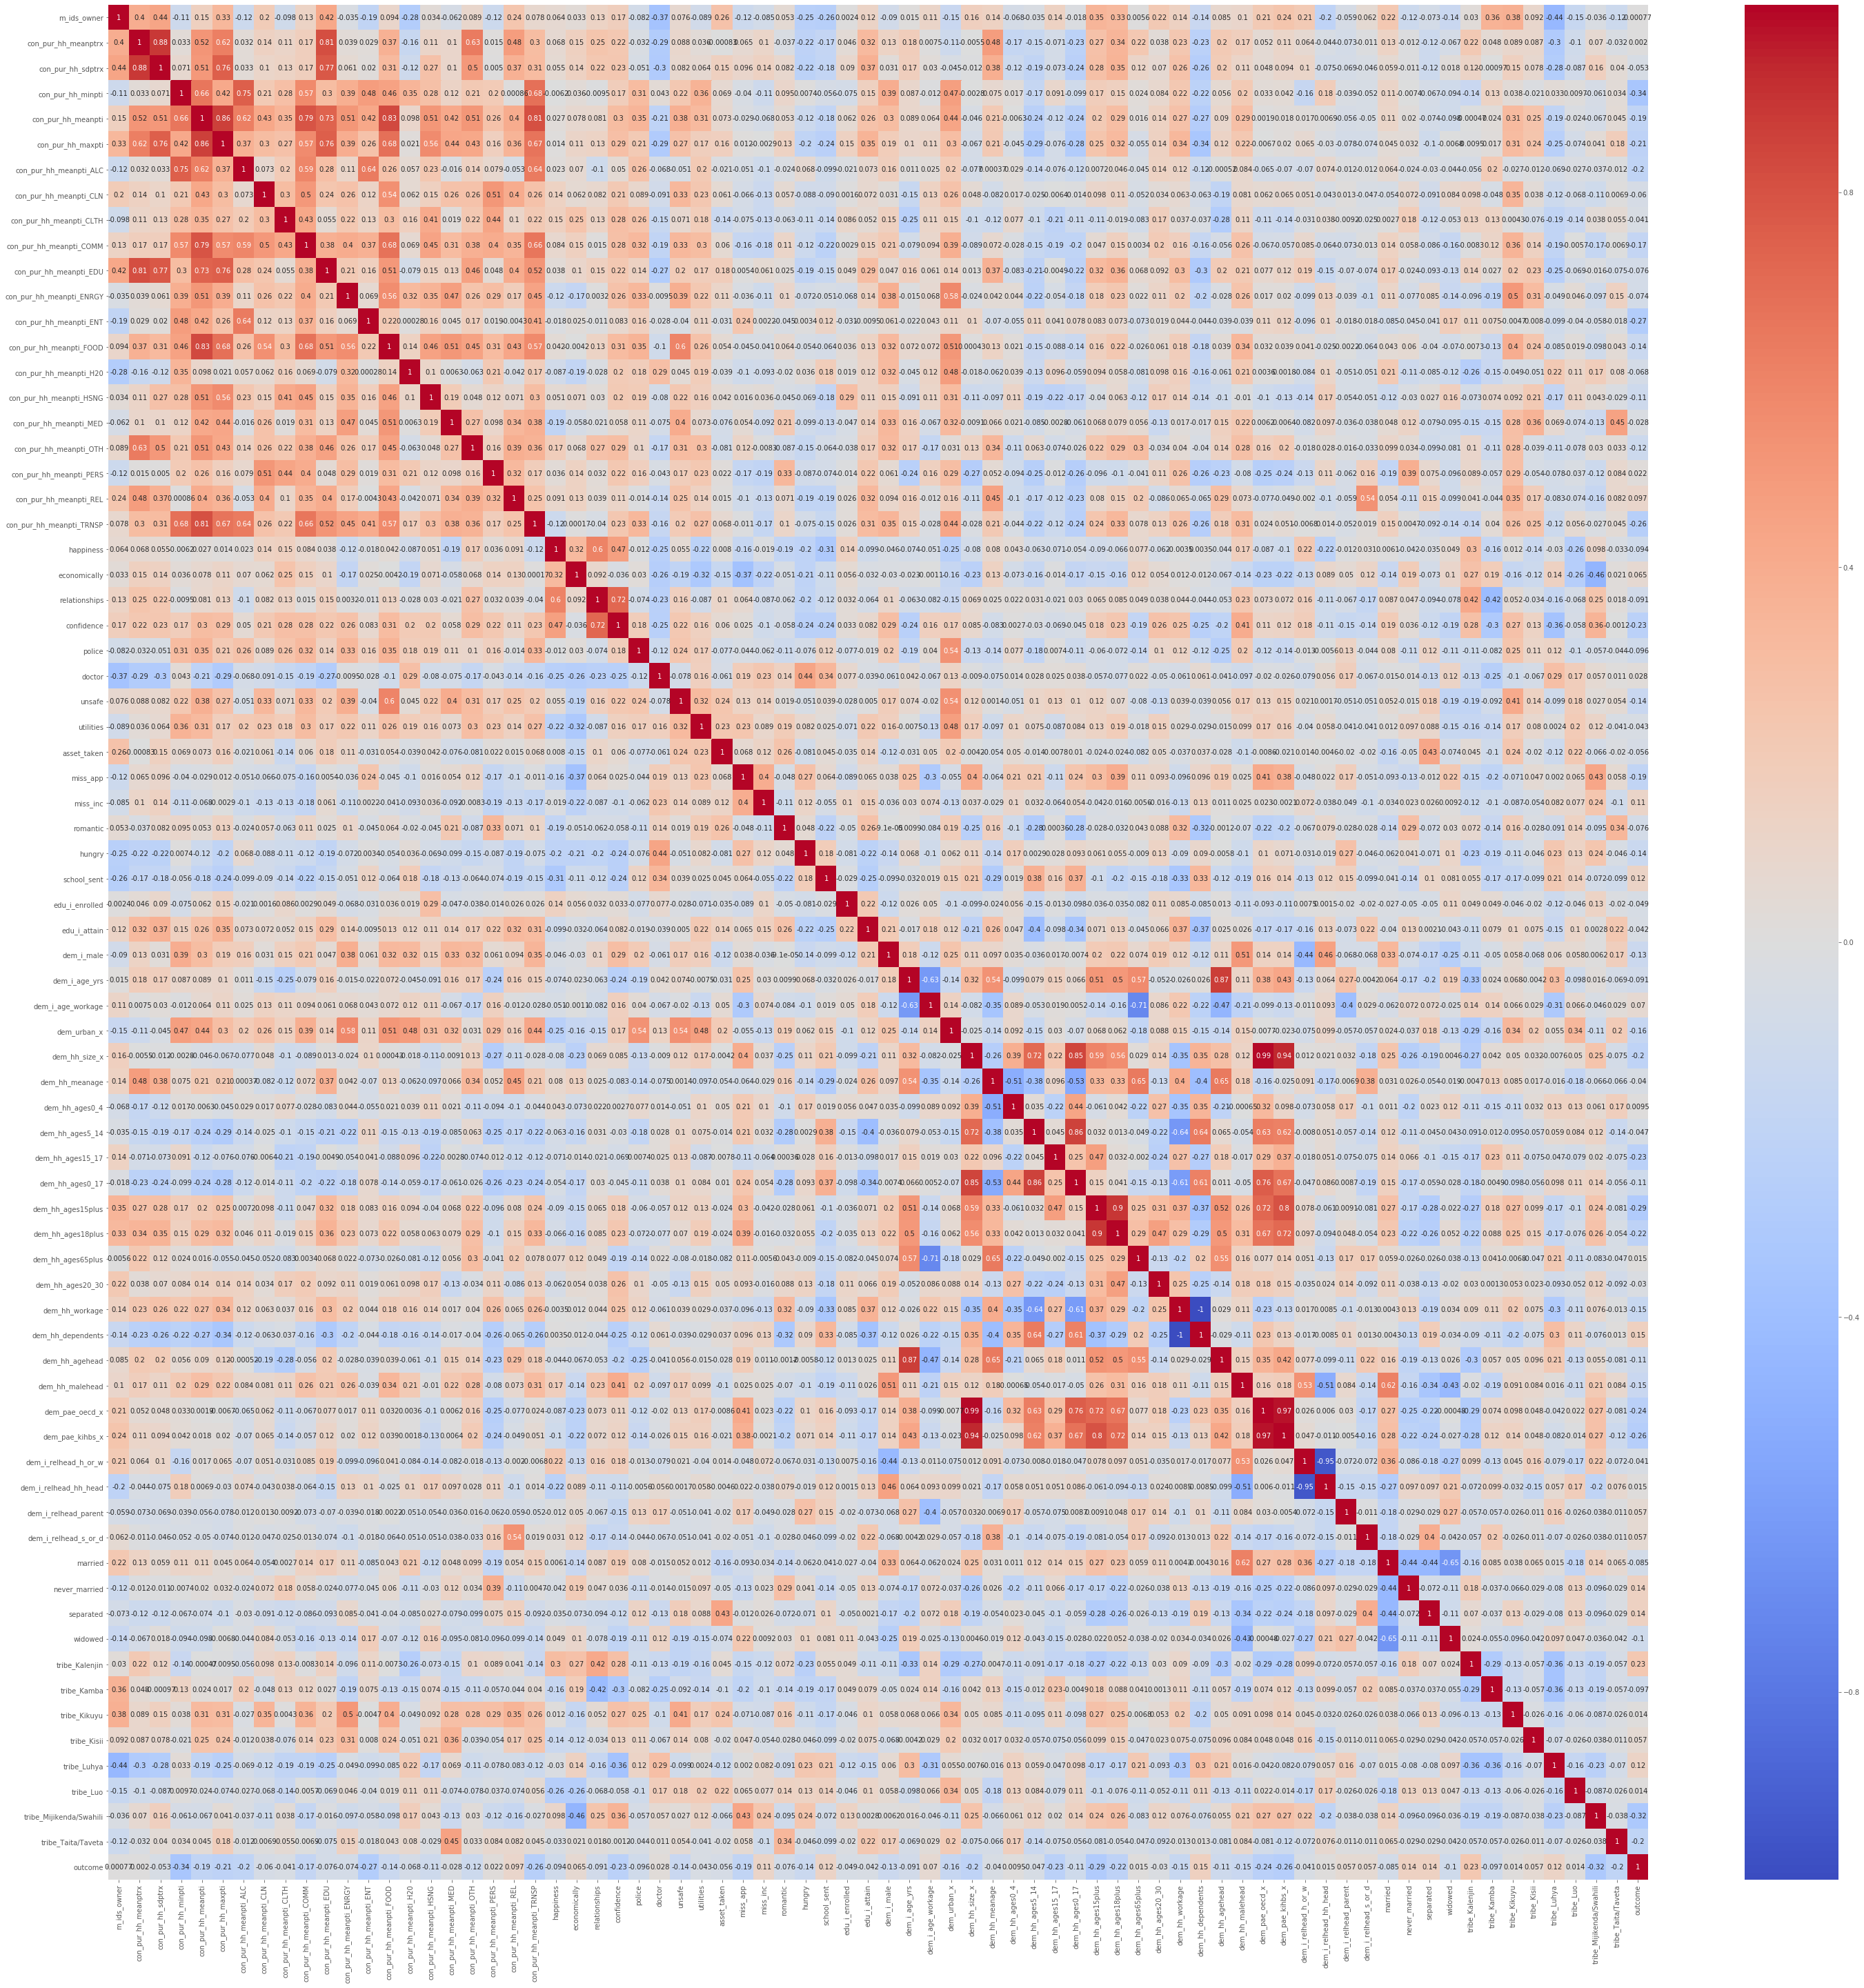

In [24]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.savefig('heatmap.jpg')

## Machine learning

In [73]:
x_train_hhids = x_train.hh_ids
x_train_m_ids = x_train.m_ids_owner

In [74]:
x_train_drop = x_train.drop(['hh_ids', 'm_ids_owner','hh_inf_lighting_source'], axis =1)

In [75]:
y_train.head()

,outcome
0,1
1,1
2,1
3,1
4,1


In [76]:
X = x_train_drop

In [77]:
y = y_train

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
model = LinearRegression()  # Create a blank class instance
model.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
X.columns

Index(['con_pur_hh_minpti', 'con_pur_hh_meanpti', 'con_pur_hh_maxpti',
       'con_pur_hh_meanpti_ALC', 'con_pur_hh_meanpti_CLN',
       'con_pur_hh_meanpti_CLTH', 'con_pur_hh_meanpti_COMM',
       'con_pur_hh_meanpti_EDU', 'con_pur_hh_meanpti_ENRGY',
       'con_pur_hh_meanpti_ENT', 'con_pur_hh_meanpti_FOOD',
       'con_pur_hh_meanpti_H20', 'con_pur_hh_meanpti_HSNG',
       'con_pur_hh_meanpti_MED', 'con_pur_hh_meanpti_OTH',
       'con_pur_hh_meanpti_PERS', 'con_pur_hh_meanpti_REL',
       'con_pur_hh_meanpti_TRNSP', 'happiness', 'economically',
       'relationships', 'confidence', 'police', 'doctor', 'unsafe',
       'utilities', 'asset_taken', 'miss_app', 'miss_inc', 'romantic',
       'hungry', 'school_sent', 'edu_i_enrolled', 'edu_i_attain', 'dem_i_male',
       'dem_i_age_yrs', 'dem_i_age_workage', 'dem_urban_x', 'dem_hh_size_x',
       'dem_hh_meanage', 'dem_hh_ages0_4', 'dem_hh_ages5_14',
       'dem_hh_ages15_17', 'dem_hh_ages0_17', 'dem_hh_ages15plus',
       'dem_hh_ages1

In [84]:
model.coef_[0]

array([ 2.45295473e-05, -8.88843644e+01, -4.01198363e-06,  8.88844578e+01,
        8.88847200e+01,  8.88846522e+01,  8.88837049e+01,  8.88843762e+01,
        8.88839590e+01,  8.88828464e+01,  8.88843481e+01,  8.88856470e+01,
        8.88843770e+01,  8.88845301e+01,  8.88841824e+01,  8.88836216e+01,
        8.88852224e+01,  8.88842085e+01,  1.52067204e-01,  7.85097388e-02,
        2.51181465e-01, -6.27022971e-01, -1.39559025e+00, -2.30015743e+00,
        9.18954033e-01,  1.38338816e+00, -4.37265236e+00, -4.14123791e-01,
        1.38609991e+00,  5.20396780e+00, -4.96835803e-01,  1.58538410e+00,
       -6.28507630e-02, -8.78938870e-02,  9.08131434e-01, -1.40822573e-02,
        2.30986410e-01, -3.20951964e-01,  6.45241294e-01, -2.22304683e-02,
        9.10373464e-01, -6.08989129e-01,  1.66646889e+00, -2.33668838e+00,
       -4.13510992e+00, -1.82401794e-01,  6.36667704e-01, -3.12548954e-02,
        6.92608374e+06,  6.92608197e+06,  9.28156998e-03, -7.86049491e-01,
       -3.92069149e-02,  

In [85]:
# Pandas is smart and understands that you gave it a bunch of rows for a dataframe.
pd.DataFrame(zip(X.columns, model.coef_[0]),
             columns=['feature', 'coefficient'])

,feature,coefficient
0,con_pur_hh_minpti,2.452955e-05
1,con_pur_hh_meanpti,-8.888436e+01
2,con_pur_hh_maxpti,-4.011984e-06
3,con_pur_hh_meanpti_ALC,8.888446e+01
4,con_pur_hh_meanpti_CLN,8.888472e+01
5,con_pur_hh_meanpti_CLTH,8.888465e+01
6,con_pur_hh_meanpti_COMM,8.888370e+01
7,con_pur_hh_meanpti_EDU,8.888438e+01
8,con_pur_hh_meanpti_ENRGY,8.888396e+01
9,con_pur_hh_meanpti_ENT,8.888285e+01


In [86]:
def summarize_linear_model(model, target_name, feature_names):
    # We'll round to 3 decimal places in printing here,
    # so it's not overwhelming to read.
    print(f"{target_name} =")
    print(f"  {model.intercept_:.3f}")
    for feature, coef in zip(feature_names, model.coef_):
          print(f"  {'+' if coef > 0 else ''}{coef:.3f} * {feature}")

In [88]:
summarize_linear_model(model, 'loan', X.columns)

loan =


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Feature selection: 

We may not have to do this, but let's see what pops out: 

In [25]:
x_train.shape

(89, 75)

In [26]:
x_train.dtypes[x_train.dtypes=='object']

hh_ids                    object
hh_inf_lighting_source    object
dtype: object

In [27]:
x_train_hhids = x_train.hh_ids
x_train_m_ids = x_train.m_ids_owner

In [28]:
x_train_drop = x_train.drop(['hh_ids', 'm_ids_owner','hh_inf_lighting_source'], axis =1)

In [24]:
from sklearn.feature_selection import *

In [25]:
select_top_20 = SelectKBest(score_func=f_classif, k = 20)
fit = select_top_20.fit(x_train_drop,y_train)
features_20 = fit.transform(x_train_drop)


In [26]:
feat_scores = pd.DataFrame()
feat_scores["F Score"] = select_top_20.scores_
feat_scores["P Value"] = select_top_20.pvalues_
feat_scores["Support"] = select_top_20.get_support()
feat_scores["Attribute"] = x_train_drop.columns

In [27]:
feat_scores.sort_values("Support", ascending = False).head(20)

,F Score,P Value,Support,Attribute
50,4.123192,0.045284,True,dem_hh_ages18plus
93,11.493935,0.001043,True,tribe_Mijikenda/Swahili
58,6.494253,0.012537,True,dem_pae_kihbs_x
60,4.873665,0.029841,True,dem_hh_size_y
61,6.033935,0.015975,True,dem_pae_oecd_y
49,6.778812,0.010808,True,dem_hh_ages15plus
62,6.494253,0.012537,True,dem_pae_kihbs_y
63,4.099794,0.045885,True,inc_hh_pti_pae_oecd
43,4.873665,0.029841,True,dem_hh_size_x
23,6.940611,0.009937,True,confidence


## Interesting. Ok let's do some modeling and see what happens: 

In [28]:
# create a list of models that you'd like to try
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [29]:
cross_val_score?

In [31]:
# for each model, do 5-fold cross-validation and record the mean accuracy
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.702339
1  SVC  0.790643
2   LR  0.790643
3   DT  0.692398
4  GNB  0.725146
5   RF  0.725146
6   GB  0.780702


3 models had nearly identical top-end performance. To narrow things down further, a good approach  would be to look at standard deviations for the scores. 

In [32]:
# for each model, do 5-fold cross-validation and record the accuracy for each fold
# this way we can see variations in performance across the folds
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='accuracy')
    
    names.append(name)
    scores.append(score)


[Text(0,0,'KNN'),
 Text(0,0,'SVC'),
 Text(0,0,'LR'),
 Text(0,0,'DT'),
 Text(0,0,'GNB'),
 Text(0,0,'RF'),
 Text(0,0,'GB')]

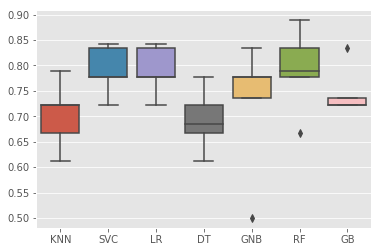

In [33]:
ax = sns.boxplot(data=scores)
ax.set_xticklabels(names)

[Text(0,0,'KNN'),
 Text(0,0,'SVC'),
 Text(0,0,'LR'),
 Text(0,0,'DT'),
 Text(0,0,'GNB'),
 Text(0,0,'RF'),
 Text(0,0,'GB')]

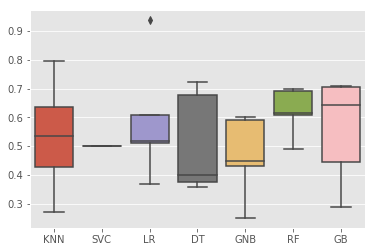

In [34]:
# Exactly the same as above, but using the area under the receiver operating characteristic curve
# as the score. 
# Make sure to pick the score that you feel is best suited for your particular problem
# see here for a list of evaluation scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train_drop, y_train, cv=kfold, scoring='roc_auc')
    
    names.append(name)
    scores.append(score)
ax = sns.boxplot(data=scores)
ax.set_xticklabels(names)

ROC and accuracy are very similar.

Notice that roc produces tighter boxes (less variance in performance) than accuracy does. Why is that?

Let's look at SVC, GB, and RF classification reports. Incidently, these SVC/GB/ or SVC/RF would make a great ensemble, we presume that they are modeling very different things

# Examine the results of each model on train data

Pick the model that best suits your needs, those might not be highest accuracy

In [35]:
svc_model = SVC()
svc_model.fit(x_train_drop, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train_drop,y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_drop,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
svc_train_predict = svc_model.predict(x_train_drop)
rf_train_predict = rf_model.predict(x_train_drop)
gb_train_predict = gb_model.predict(x_train_drop)

In [37]:
print(classification_report(y_train,svc_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91



In [38]:
print(classification_report(y_train,rf_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91



In [39]:
print(classification_report(y_train,gb_train_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00        91

